# **LAB1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls

drive  sample_data


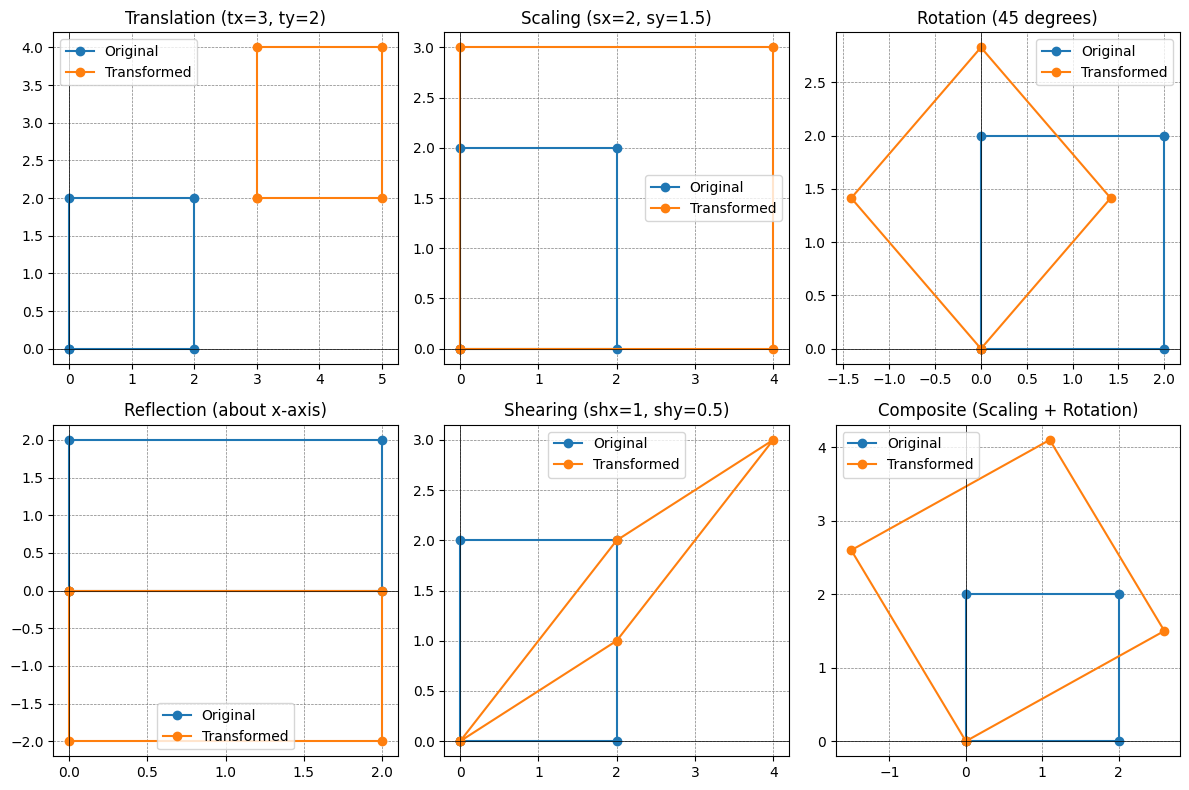

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to apply a transformation matrix to a set of points
def apply_transformation(points, transformation_matrix):
    # Add a row of 1s for homogeneous coordinates
    homogeneous_points = np.vstack((points, np.ones((1, points.shape[1]))))
    transformed_points = np.dot(transformation_matrix, homogeneous_points)
    return transformed_points[:2, :]  # Return only the x and y coordinates

# Define transformation matrices
def translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def scaling(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def rotation(angle):
    rad = np.radians(angle)
    return np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])

def reflection(axis):
    if axis == 'x':
        return np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        return np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        return np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'origin'.")

def shearing(shx, shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])

# Define a sample 2D object (a square)
object_points = np.array([
    [0, 2, 2, 0, 0],  # x-coordinates
    [0, 0, 2, 2, 0]   # y-coordinates
])

# Perform transformations
transformations = [
    ("Translation (tx=3, ty=2)", translation(3, 2)),
    ("Scaling (sx=2, sy=1.5)", scaling(2, 1.5)),
    ("Rotation (45 degrees)", rotation(45)),
    ("Reflection (about x-axis)", reflection('x')),
    ("Shearing (shx=1, shy=0.5)", shearing(1, 0.5)),
    ("Composite (Scaling + Rotation)", np.dot(rotation(30), scaling(1.5, 1.5)))
]

# Plot transformations in subplots
plt.figure(figsize=(12, 8))
for i, (title, matrix) in enumerate(transformations, 1):
    transformed_points = apply_transformation(object_points, matrix)
    plt.subplot(2, 3, i)
    plt.plot(*object_points, label='Original', marker='o')
    plt.plot(*transformed_points, label='Transformed', marker='o')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title(title)

plt.tight_layout()
plt.show()


In [ ]:
!pip install opencv-python


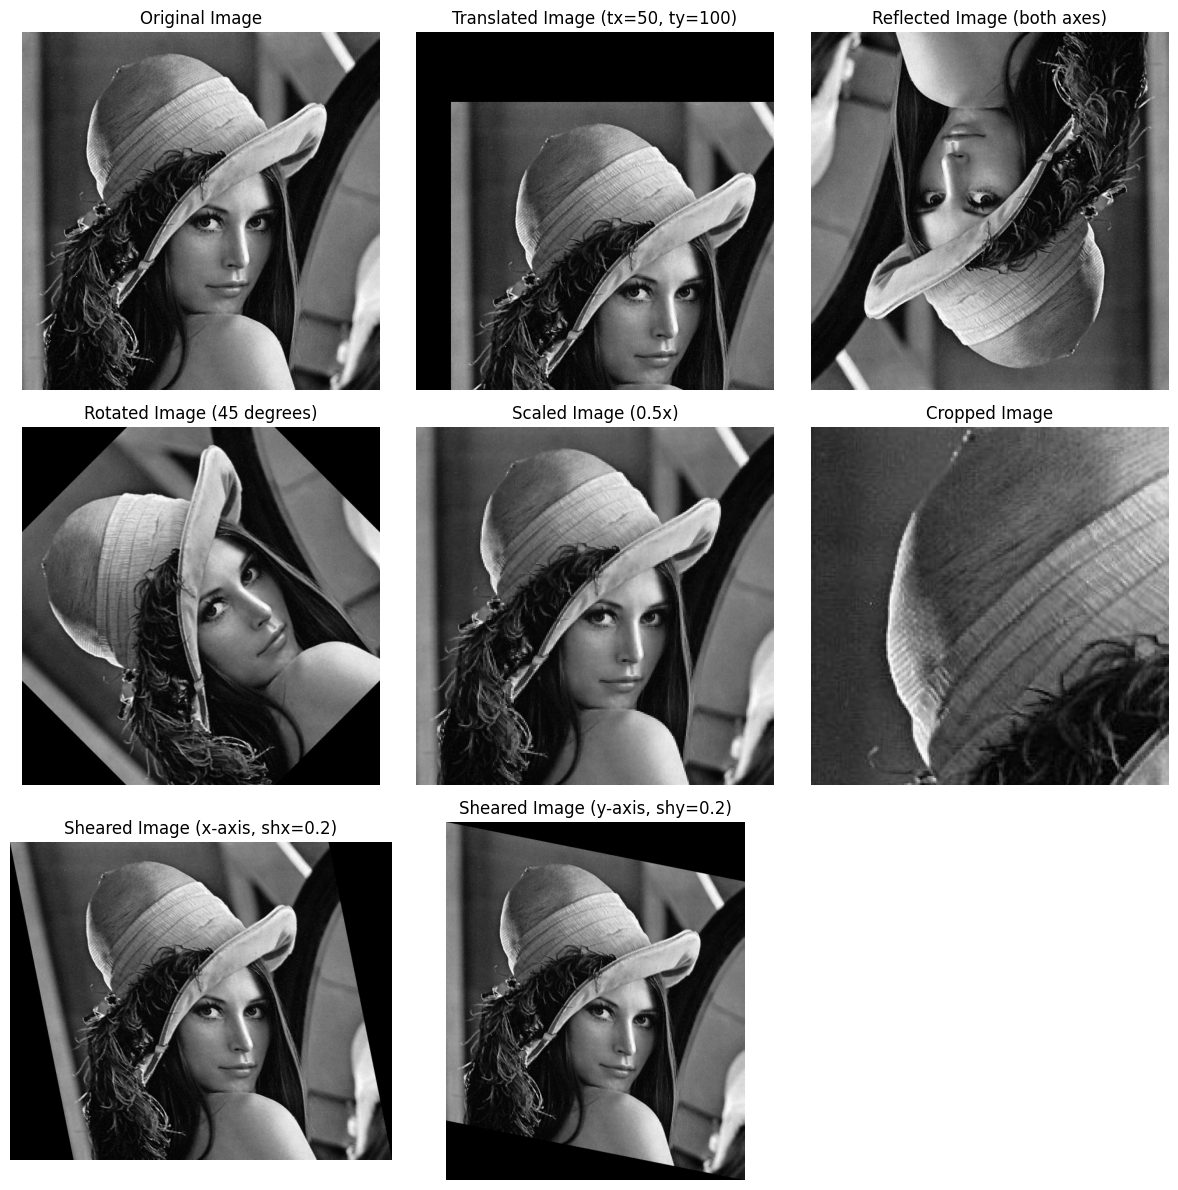

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images in subplots
def display_in_subplots(titles, images):
    plt.figure(figsize=(12, 12))
    for i, (title, image) in enumerate(zip(titles, images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load an image
image = cv2.imread('1mg.jpg')  # Replace 'your_image.jpg' with the path to your image
if image is None:
    raise ValueError("Image not found! Ensure the path is correct.")

# Original Image
titles = ["Original Image"]
images = [image]

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, translation_matrix, (cols, rows))

translated_image = translate_image(image, tx=50, ty=100)
titles.append("Translated Image (tx=50, ty=100)")
images.append(translated_image)

# 2. Image Reflection
def reflect_image(image, axis):
    if axis == 'x':
        return cv2.flip(image, 0)
    elif axis == 'y':
        return cv2.flip(image, 1)
    elif axis == 'xy':
        return cv2.flip(image, -1)
    else:
        raise ValueError("Axis must be 'x', 'y', or 'xy'.")

reflected_image = reflect_image(image, axis='xy')
titles.append("Reflected Image (both axes)")
images.append(reflected_image)

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    return cv2.warpAffine(image, rotation_matrix, (cols, rows))

rotated_image = rotate_image(image, angle=45)
titles.append("Rotated Image (45 degrees)")
images.append(rotated_image)

# 4. Image Scaling
def scale_image(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

scaled_image = scale_image(image, fx=0.5, fy=0.5)
titles.append("Scaled Image (0.5x)")
images.append(scaled_image)

# 5. Image Cropping
def crop_image(image, x_start, y_start, width, height):
    return image[y_start:y_start + height, x_start:x_start + width] #ending row ending col

cropped_image = crop_image(image, x_start=50, y_start=50, width=200, height=200)
titles.append("Cropped Image")
images.append(cropped_image)

# 6. Image Shearing (x-axis)
def shear_image_x(image, shx):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols + int(shx * rows), rows))

sheared_image_x = shear_image_x(image, shx=0.2)
titles.append("Sheared Image (x-axis, shx=0.2)")
images.append(sheared_image_x)

# 7. Image Shearing (y-axis)
def shear_image_y(image, shy):
    rows, cols = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(image, shear_matrix, (cols, rows + int(shy * cols)))

sheared_image_y = shear_image_y(image, shy=0.2)
titles.append("Sheared Image (y-axis, shy=0.2)")
images.append(sheared_image_y)

# Display all transformations in subplots
display_in_subplots(titles, images)
